In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sns.set_style('white')

In [3]:
mpl.rcParams['figure.figsize'] = 8, 8
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = '0.3'
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['axes.labelcolor'] = '0.3'
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['patch.edgecolor'] = 'none'
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['xtick.color'] = '0.3'
mpl.rcParams['ytick.color'] = '0.3'
mpl.rcParams['text.color'] = '0.3'

In [4]:
def plot_supervised_model(name, model, X_test, y_test, y_pred):
    cmap_light = ListedColormap(['#d5deb3', '#a3d1db', '#f5b8b8', '#ffc8a3', '#b792ba', '#aabad1', '#b2d7ca', '#ffe192'])
    cmap_bold = ListedColormap(['#8ba52c', '#00819b', '#e43939'])
    plt.figure(figsize=(8, 8))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, cmap=cmap_bold)
    idx = np.where(y_pred != y_test)
    plt.scatter(X_test[idx, 0], X_test[idx, 1], c=y_pred[idx], s=300, alpha=0.2, cmap=cmap_bold)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title(name)
    plt.show()

In [12]:
def plot_unsupervised_model(name, model, X):
    cmap_light = ListedColormap(['#d5deb3', '#a3d1db', '#f5b8b8', '#ffc8a3', '#b792ba', '#aabad1', '#b2d7ca', '#ffe192'])
    cmap_bold = ListedColormap(['#8ba52c', '#00819b', '#e43939'])
    h = .02
    X_sub = X[:, :2]
    model.fit(X_sub, y)
    centroids = model.cluster_centers_
    x_min, x_max = X_sub[:, 0].min() - 1, X_sub[:, 0].max() + 1
    y_min, y_max = X_sub[:, 1].min() - 1, X_sub[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_sub[:, 0], X_sub[:, 1], s=50, cmap=cmap_bold)
    plt.scatter(centroids[:, 0], centroids[:, 1], 
                marker='x', s=300, linewidths=5,
                color='w', zorder=10)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(name)
    plt.xlabel('Sepal Length', fontsize=20)
    plt.ylabel('Sepal Width', fontsize=20)
    plt.show()

Finally, in the last part we'll look at one unsupervised machine learning model, K-Means Clustering, and discuss the method for determining the optimal number of clusters.

In [6]:
iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target

## K-Means Clustering

In [7]:
models = [('KMeans 2 clusters', KMeans(n_clusters=2)),
          ('KMeans 3 clusters', KMeans(n_clusters=3)), 
          ('KMeans 8 clusters', KMeans(n_clusters=8))]

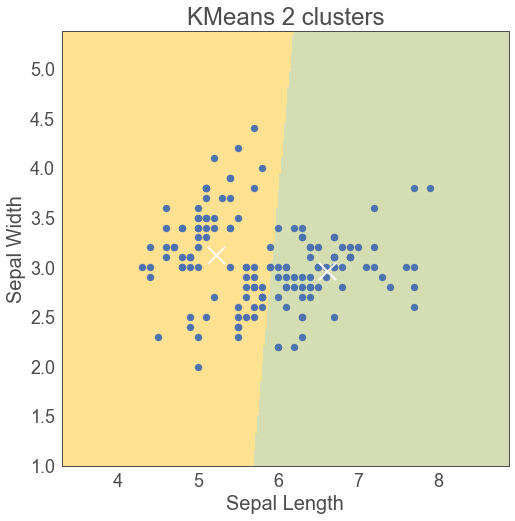

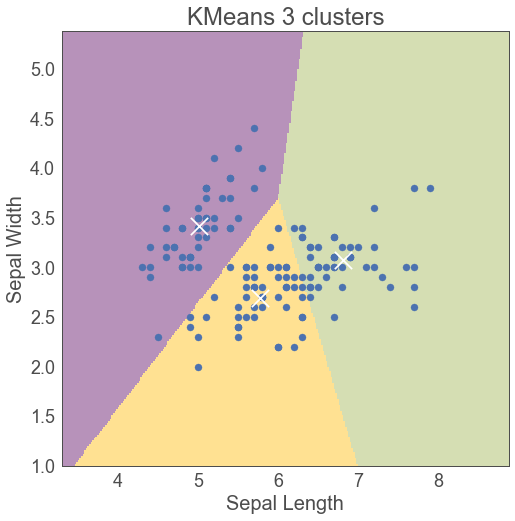

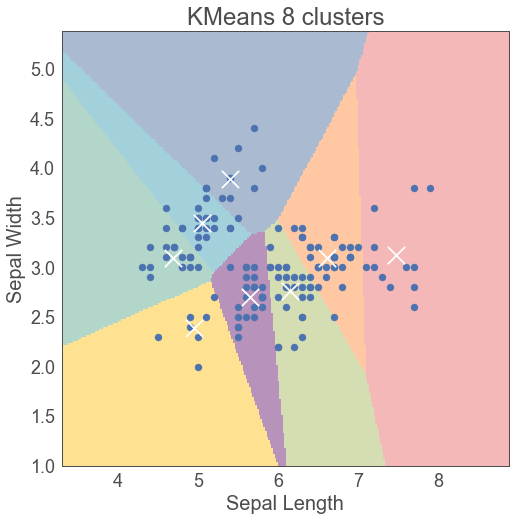

In [8]:
for name, model in models:
    plot_unsupervised_model(name, model, X)

How to pick the number of clusters? E.g. elbow method, or silhouette score

In [11]:
for n_cluster in range(2, 11):
    model = KMeans(n_clusters=n_cluster).fit(X)
    silhouette_coefficient = silhouette_score(X, model.labels_, metric='euclidean')
    print("{} clusters: {}".format(n_cluster, silhouette_coefficient))

2 clusters: 0.6808136202713507
3 clusters: 0.5525919445213676
4 clusters: 0.4969928499492594
5 clusters: 0.48851755085386317
6 clusters: 0.3682056965376459
7 clusters: 0.348589592173392
8 clusters: 0.3614201862927742
9 clusters: 0.32880158649306535
10 clusters: 0.321210080238194
